In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

KeyboardInterrupt: 

In [ ]:
df_penguins = pd.read_csv("Data/penguins.csv") # Importation des données (Penser à remplacer par le bon chemin)
df_penguins.head() # Regarder les premières lignes pour se donner une idées du dataset

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
df_penguins.drop(columns = 'Unnamed: 0', inplace = True) # Retirer la colonne Unnamed: 0 car elle est inutile
df_penguins.info() # Regarder si il y a des valeurs nuls ou peu utiles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:
df_penguins.dropna(inplace = True) # Retirer les valeurs nuls car il y en a très peu

In [ ]:
# On regarde si il nous reste des valeurs nulles 
missing_values_count = df_penguins.isnull().sum()
missing_values_count

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [ ]:
df_penguins['species'].value_counts() # Regarder la colonne species

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [ ]:
df_penguins['island'].value_counts() # Regarder la colonne island

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

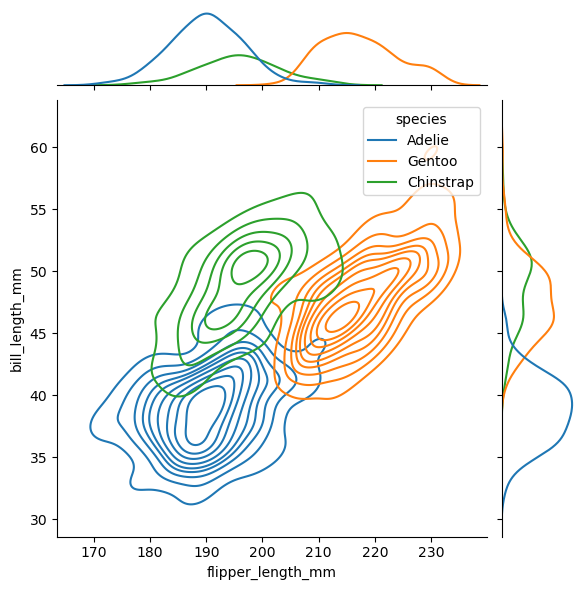

In [ ]:
# Un petit jointplot pour se donner une idée de la répartition des manchots selon la taille des palmes et des bills
sns.jointplot(x='flipper_length_mm',y='bill_length_mm',data=df_penguins, hue="species",kind="kde" )

In [ ]:
# On regarde le nombre de variables uniques dans chaque colonne qui contient des nombres
num = df_penguins.select_dtypes('number').columns
for num_col in num:
    print(f"{num_col} : {df_penguins[num_col].nunique()} variables uniques")

bill_length_mm : 163 variables uniques
bill_depth_mm : 79 variables uniques
flipper_length_mm : 54 variables uniques
body_mass_g : 93 variables uniques
year : 3 variables uniques


In [ ]:
# On encode la data avec un fit transform pour donner un numéro suivant l'espece ou l'île (donc colonne de type Obj), allant de 0 à 2
label = LabelEncoder() # On passe par un label encoder

for i in df_penguins.columns:
    if df_penguins[i].dtype == "object":
        label.fit_transform(list(df_penguins[i].values))
        df_penguins[i] = label.transform(df_penguins[i].values)

In [ ]:
# Table de correlation sur le dataset df_penguins, on voit plus clairement qui influe
penguins_corr = df_penguins.corr()
penguins_corr

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
species,1.000000,-0.622428,0.730548,-0.740346,0.850737,0.750434,0.010964,0.004727
island,-0.622428,1.000000,-0.337179,0.568031,-0.554413,-0.559526,-0.012435,-0.042111
bill_length_mm,0.730548,-0.337179,1.000000,-0.228626,0.653096,0.589451,0.344078,0.032657
bill_depth_mm,-0.740346,0.568031,-0.228626,1.000000,-0.577792,-0.472016,0.372673,-0.048182
flipper_length_mm,0.850737,-0.554413,0.653096,-0.577792,1.000000,0.872979,0.255169,0.151068
body_mass_g,0.750434,-0.559526,0.589451,-0.472016,0.872979,1.000000,0.424987,0.021862
sex,0.010964,-0.012435,0.344078,0.372673,0.255169,0.424987,1.000000,-0.000467
year,0.004727,-0.042111,0.032657,-0.048182,0.151068,0.021862,-0.000467,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'species'),
  Text(0, 1.5, 'island'),
  Text(0, 2.5, 'bill_length_mm'),
  Text(0, 3.5, 'bill_depth_mm'),
  Text(0, 4.5, 'flipper_length_mm'),
  Text(0, 5.5, 'body_mass_g'),
  Text(0, 6.5, 'sex'),
  Text(0, 7.5, 'year')])

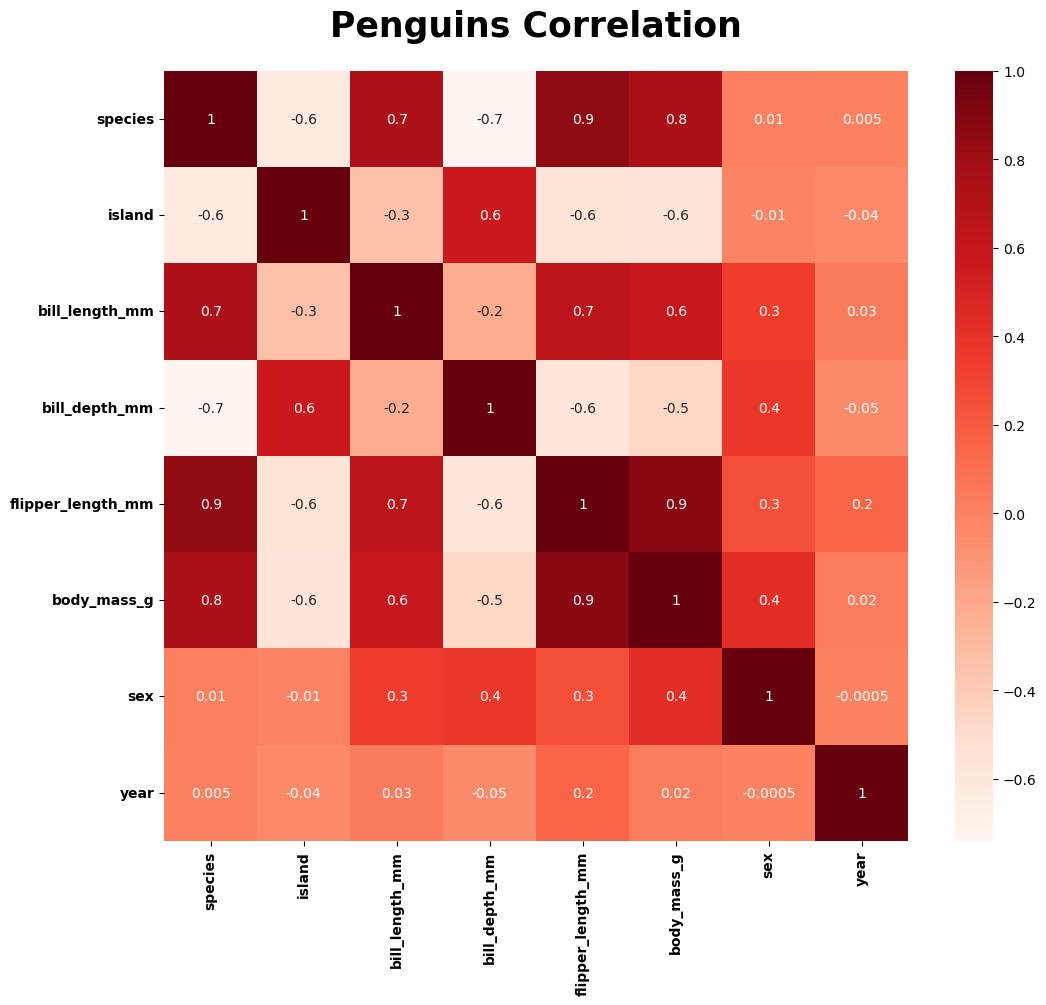

In [ ]:
# On le met en graphique pour que ce soit bien clair
plt.figure(figsize=(12, 10))
sns.heatmap(penguins_corr, fmt=".1g", annot=True, cmap="Reds")
plt.title("Penguins Correlation", weight="bold", fontsize=25, pad=25)
plt.xticks(weight="semibold", fontsize=10)
plt.yticks(weight="semibold", fontsize=10)

In [ ]:
# On convertie la serie en dataframe et on se rend compte que le sex des manchots n'est pas très influent sur les autres colonnes
penguins_corr["species"].sort_values(ascending=False).to_frame()

,species
species,1.000000
flipper_length_mm,0.850737
body_mass_g,0.750434
bill_length_mm,0.730548
sex,0.010964
year,0.004727
island,-0.622428
bill_depth_mm,-0.740346


In [ ]:
# Je vais passer par un Mutual donc je récupere les Mutual Information dans mon dataset
X_mutual = df_penguins.astype("int64").reset_index().copy()
y_mutual = X_mutual.pop("species")

del X_mutual["index"]

# On passe tout en int
discrete_features = X_mutual.dtypes == int

In [ ]:
# On calcul le mi_score de nos colonnes pour avoir reellement leur impact sur les autres
mi_scores = mutual_info_classif(X_mutual, y_mutual, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mutual.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores.to_frame()

,MI Scores
island,0.512063
flipper_length_mm,0.498848
bill_length_mm,0.484038
bill_depth_mm,0.451000
body_mass_g,0.450769
sex,0.028066
year,0.000000


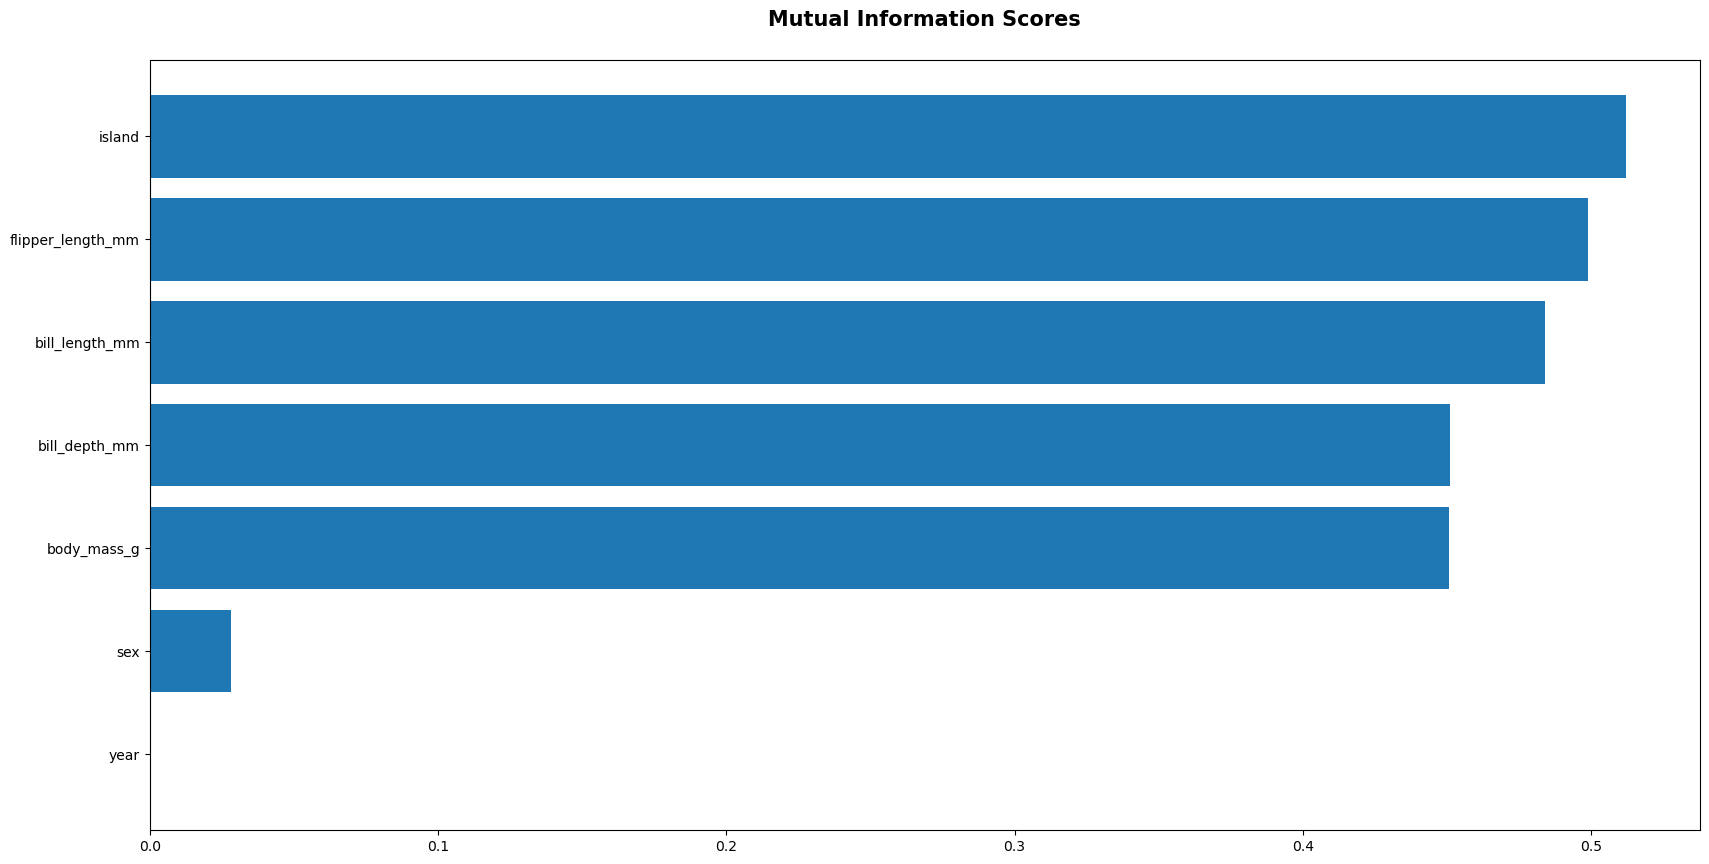

In [ ]:
# sous format de tableau pour mieux se rendre compte de l'inutilité de la colonne sex dans notre objectif de classification
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)

plt.figure(figsize=(20, 10))
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores",
            weight="bold",
            fontsize=15,
            pad=25)
plt.show()

In [ ]:
# Je decide donc de laisser de coté la colonne sex et de creer mes X_features et y_labels pour mes prochaines predictions
X_features = df_penguins[["flipper_length_mm",  "body_mass_g",
            "bill_length_mm", "bill_depth_mm", 
            "island", "year"]]
y_labels = df_penguins["species"]

X_features.shape, y_labels.shape

((333, 6), (333,))

In [ ]:
# toute nos données sont bien a la meme echelle
X_features.head()

,flipper_length_mm,body_mass_g,bill_length_mm,bill_depth_mm,island,year
0,181.0,3750.0,39.1,18.7,2,2007
1,186.0,3800.0,39.5,17.4,2,2007
2,195.0,3250.0,40.3,18.0,2,2007
4,193.0,3450.0,36.7,19.3,2,2007
5,190.0,3650.0,39.3,20.6,2,2007


In [ ]:
# On remarque qu'il y a plus d'espece 0 que de 1 (plus du double)
y_labels.value_counts()

species
0    146
2    119
1     68
Name: count, dtype: int64

In [ ]:
# Train_test_split notre prediction en rajoutant 'stratify' afin de bien avoir le meme nombre de y_labels de chaque cotés pour avoir une prédiction plus sur et moins hasardeuse
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, random_state=42, 
    test_size=.25, stratify=y_labels
)

print(f"X_train shape: {X_train.shape} \n"
       f"X_test shape: {X_test.shape} \n"
       f"y_train shape: {y_train.shape} \n"
       f"y_test.shape: {y_test.shape}")

X_train shape: (249, 6) 
X_test shape: (84, 6) 
y_train shape: (249,) 
y_test.shape: (84,)


In [ ]:
# Je suis passer par un GridSearchCV pour avoir un peu plus d'infos sur ma prediction, ensuite c'est via un Decision Tree que l'on prédi nos résultat on remarque que la précision est plutot bonne sans overfitting'
parameter = {
    "max_depth": [2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"],
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"]
}

model = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                     param_grid=parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(f"model train score: {model.score(X_train, y_train)},\n" 
      f"model test score: {model.score(X_test, y_test)},\n" 
      f"model best score: {model.best_score_}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits


model train score: 0.9718875502008032,
model test score: 0.9642857142857143,
model best score: 0.9477911646586344


c:\Users\Valentin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Valentin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Valentin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Valentin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Valentin\anaconda3\Li

In [ ]:
# On selectionne le meilleur estimateur et on le fit dans le best_model
best_model = model.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=42)

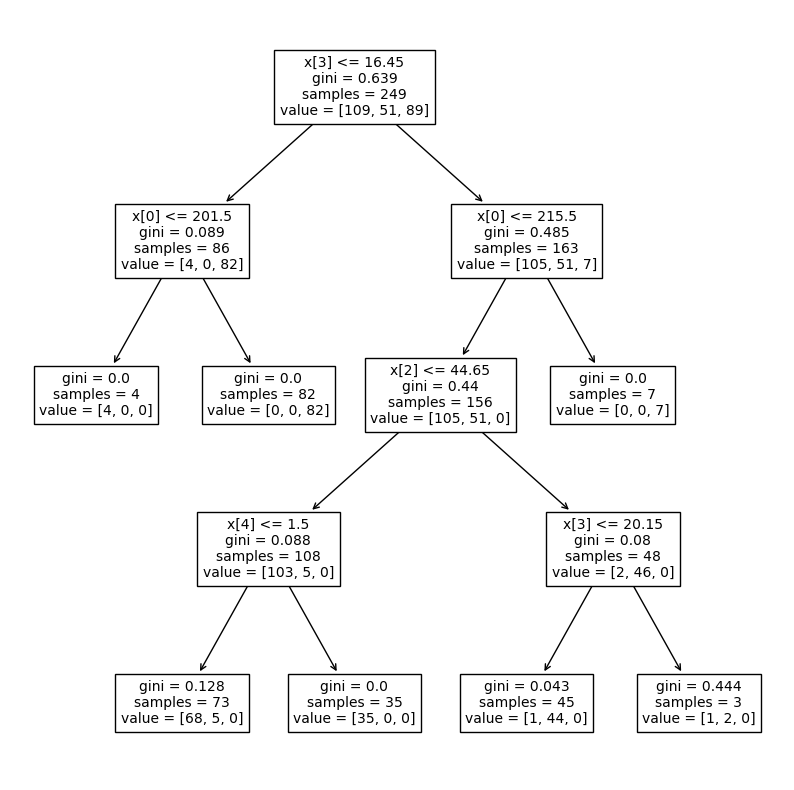

In [ ]:
# On fait un plot tree de ce best_model afin d'avoir notre chemin de reconaissance de notre IA
plt.subplots(figsize=(10, 10))
tree.plot_tree(best_model, fontsize=10);

In [ ]:
# On regarde la précision et l'accuracy de notre model et on remarque qu'il est convenable 
y_pred = best_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.88      0.94      0.91        16
           2       1.00      1.00      1.00        30

    accuracy                           0.96        84
   macro avg       0.95      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



Text(113.9222222222222, 0.5, 'predicted label')

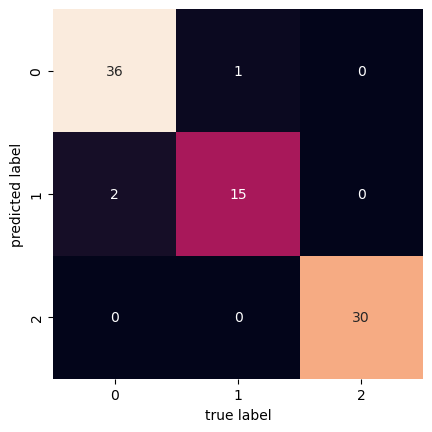

In [ ]:
# Avec une matrice de confusion on regarde ce que notre model nous sort, on remarque que pour le cas 0 on est presque sur un sans fautes, pour le cas 1 on a un peu plus d'erreurs et que au contraire notre cas 2 a 100% de réussite
mat = confusion_matrix(y_pred, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)

plt.xlabel("true label")
plt.ylabel("predicted label")

In [ ]:
# Merci d'avoir lu mon brief !  J'espere que les commentaires on bien aidés a la comprehension de celui-ci, bon courage pour les prochaines corrections !